In [1]:
# sc.install_pypi_package("pip==22.0.4")
# sc.install_pypi_package("pandas==0.25.1")
# sc.install_pypi_package("Pillow")
# sc.install_pypi_package("pyarrow")

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>''')

In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import io
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, udf
from pyspark.sql import functions as F

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import warnings
warnings.filterwarnings('ignore')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

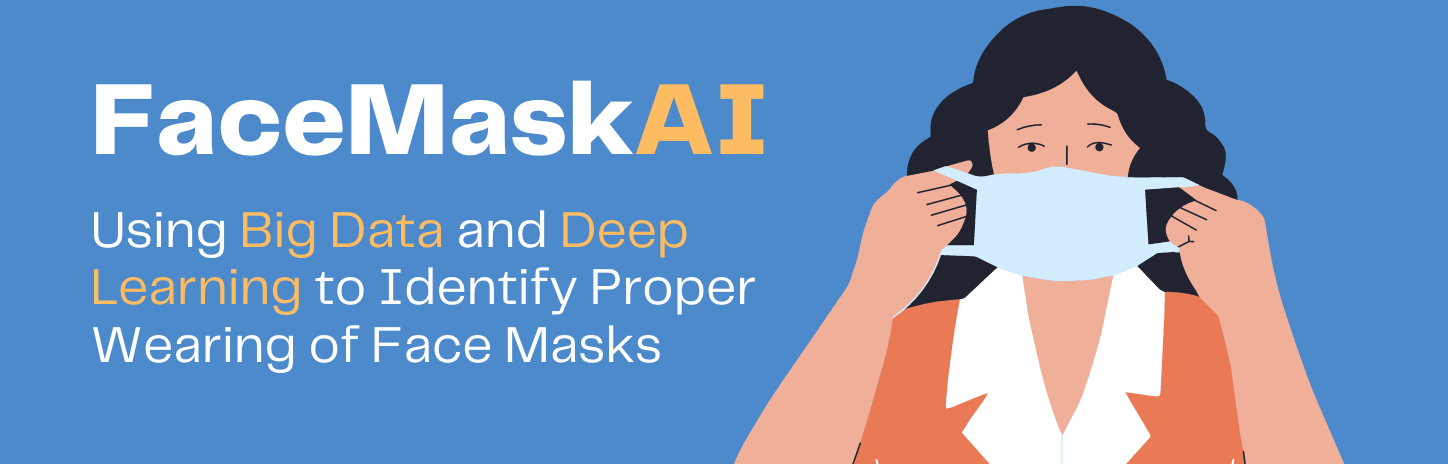

## <font color="4988CD"> I. Executive Summary </font>

## <font color="4988CD"> II. Introduction </font>

The Coronavirus disease pandemic of 2019 (**COVID-19**) is currently regarded as one of the most serious worldwide hazards, posing a threat not only to public health and well-being, but also to global economic and social stability. COVID-19 is an infectious disease caused by the SARS-CoV-2 virus. The majority of those infected with the virus will have mild to moderate respiratory symptoms and will recover without the need for medical attention. Some, on the other hand, will become critically unwell and require medical assistance. Serious sickness is more likely to strike the elderly and those with underlying medical conditions such as cardiovascular disease, diabetes, chronic respiratory disease, or cancer. COVID-19 can make anyone sick and cause them to get very ill or die at any age.

The virus spreads through transfer of microscopic liquid particles from infected persons' mouth or nose by coughing, sneezing, speaking, singing, and/or breathing. Larger respiratory droplets to smaller aerosols are among these particles. Coughing into a flexed elbow, staying at least 1 meter away from people, _wearing a well fitted mask_, and washing hands or using an alcohol-based rub on a regular basis are all crucial respiratory etiquette that can help prevent the spread of the virus. Being thoroughly informed on the disease and how it spreads is the best strategy to avoid and slow down transmission.

A number of public health and hygiene measures have been implemented, the most visible of which being the use of face masks. Medical studies on the use of face masks as personal protective equipment (PPE) to prevent SARS-CoV-2 transmission was viewed with caution, and health officials' first recommendations was contradictory. The World Health Organization (WHO) recommendation was created to minimize undue paternalism while yet being comprehensive in its discussion of several medical issues of mask use. It was, however, amended multiple times, moving away from original pronouncements that face masks should not be used by healthy people and toward gradual acceptance of face masks as a beneficial tool in decreasing community transmission. In particular, “…WHO has updated its guidance to advise that to prevent COVID-19 transmission effectively in areas of community transmission, governments should encourage the general public to wear masks in specific situations and settings as part of a comprehensive approach to suppress SARS-CoV-2 transmission".

Masks will remain a crucial strategy to stay safe in specific contexts as long as highly contagious strains of the coronavirus, such as Omicron, continue to prolong the pandemic.

## <font color="4988CD"> III. Motivation of the Study </font>

While many people have resumed pre-pandemic activities, such as going back to work, gyms, and restaurants, there is still concern about reducing COVID measures, even among those who are not at high risk for serious illness. As COVID restrictions are slowly being lifted, it is believed that wearing masks is still necessary in our present reality, especially in the Philippines where herd immunity is still a long way to go.

The proponents believe that there is value in utilizing Artifical Intelligence (AI) to properly monitor wearing of face masks. Proper mask usage in public areas has been shown to be critical in the efforts to reduce infection spread in circumstances such as the COVID-19 pandemic. This can be used to automate checking of compliance to mask-wearing rules in crowded places such as airports and malls. This can also be used by private establishments to detect if employees are maintaining safety standards at work, and can keep track of personnel who do not wear masks and remind them to do so. The project can also help generate data for authorities to determine whether more campaigns are needed to encourage wearing of face masks. And lastly, the model can be incorporated into facial recognition software used in mobile devices, to help improve security features for users.

## <font color="4988CD"> IV. Problem Statement </font>

To help society transition to this new ‘new normal’, the proponents aim to answer the question:

> **Can we train a model to identify if a person is wearing a mask properly using big data and cloud computing  techniques and machine learning?**

## <font color="4988CD"> V. Data Source </font>

## <font color="4988CD"> VI. Methodology </font>

The approach in tackling the problem of this study is outlined by the methodology.

<center><b>Figure x: Methodology</b></center>

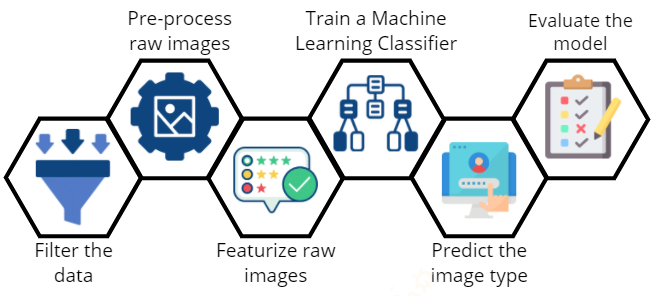

1. **Filtering the data**
    - The dataset consists of images with different file sizes from `0.01 Mb` to `11.11 Mb`
    - Some of the smaller sized images were corrupted. The workaround is to filter the data so as not to capture those images that were corrupted. This will save time by not singling out the corrupted images.
    - In this regard, the images considered to be processed were `1.5 Mb to 5.5 Mb` in size, with a total of `22,034` images and total data size of `59,677.77 MB` or `59.68 Gb`.


2. **Pre-processing raw images**
    - Raw images were vectorized to represent the pixels as vectors.
    - Vectorizing the images to a format that the computer understands.
    
    
3. **Featurize raw images**
    - A pre-trained deep neural network model was used to extract relevant features from images.
    - EfficientNet B0 was used to extract relevant features from the images.
    - This allows the researchers to build classifier models using standard machine learning approaches. 
    
    
4. **Training an ML Classifier**
    - Random Forest Classifier and Logistic Regression was used as the ML classifier models.
    
    
5. **Predicting the image type**
    - After training the model, it was tested to predict unseen data.
    
    
6. **Evaluating the model**
    - The metrics used to evaluate the model was `accuracy`.
    - The model was evaluated on how it performed on unseen data.

# Exploratory Data Analysis

In [52]:
image_path = '../medical-masks-part1/images/'
def load_images_from_directory(main_directory, name_list):
    total_labels=[]
    images=[]
    total_1=0
    total_2=0
    total_3=0
    total_4=0
    for name in name_list:
        full_path = os.path.join(main_directory,name)
        for image in os.listdir(full_path)[:16]:
            img = cv2.imread(image)
            images.append(img)
        return shuffle(images)

In [66]:
full_path = []
for name in name_list:
    filename = os.path.join(image_path,name)
    full_path.append(filename)

In [69]:
full_path[:16]

['../medical-masks-part1/images/000001_1_000001_MALE_25.jpg',
 '../medical-masks-part1/images/000001_2_000001_MALE_25.jpg',
 '../medical-masks-part1/images/000001_3_000001_MALE_25.jpg',
 '../medical-masks-part1/images/000001_4_000001_MALE_25.jpg',
 '../medical-masks-part1/images/000002_1_000002_MALE_23.jpg',
 '../medical-masks-part1/images/000002_2_000002_MALE_23.jpg',
 '../medical-masks-part1/images/000002_3_000002_MALE_23.jpg',
 '../medical-masks-part1/images/000002_4_000002_MALE_23.jpg',
 '../medical-masks-part1/images/000003_1_000003_FEMALE_22.jpg',
 '../medical-masks-part1/images/000003_2_000003_FEMALE_22.jpg',
 '../medical-masks-part1/images/000003_3_000003_FEMALE_22.jpg',
 '../medical-masks-part1/images/000003_4_000003_FEMALE_22.jpg',
 '../medical-masks-part1/images/000004_1_000004_FEMALE_25.jpg',
 '../medical-masks-part1/images/000004_2_000004_FEMALE_25.jpg',
 '../medical-masks-part1/images/000004_3_000004_FEMALE_25.jpg',
 '../medical-masks-part1/images/000004_4_000004_FEMALE_2

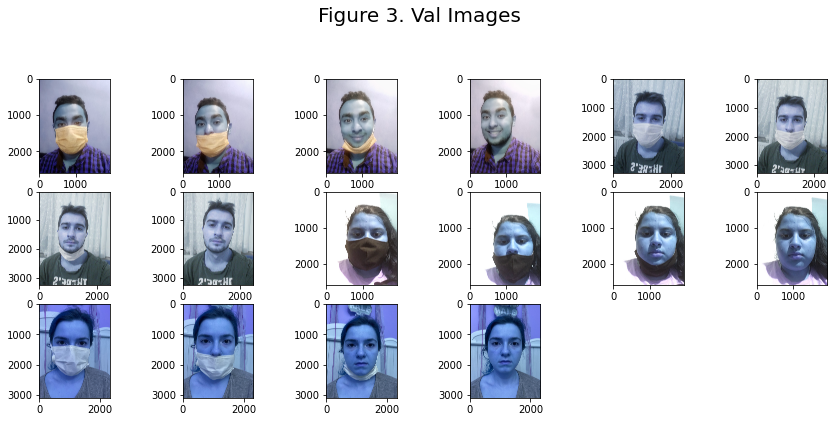

In [113]:
name_list = df['name'].to_list()

full_path = []
for name in name_list:
    filename = os.path.join(image_path,name)
    full_path.append(filename)


images = []
for i in full_path[:16]:
    img = cv2.imread(i)
    images.append(img)

plt.figure(figsize=(15,10))
plt.suptitle("Figure 3. Val Images", fontsize=20)
for i in range(16):
    plt.subplot(5,6,i+1)
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)

In [87]:
image = cv2.imread('../medical-masks-part1/images/000001_1_000001_MALE_25.jpg')


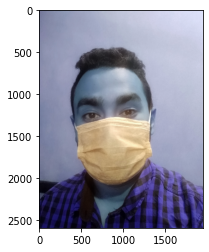

In [89]:
plt.imshow(image, cmap=plt.cm.binary)

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from cv2 import cv2

In [115]:
df = pd.read_csv('../medical-masks-part1/df.csv')
#dropping images identified as corrupted via manual isolation methods
df = df[(df['name'] != '000030_1_000030_NONE_29.jpg') & (df['name'] != '007790_1_005591_NONE_27.jpg')]

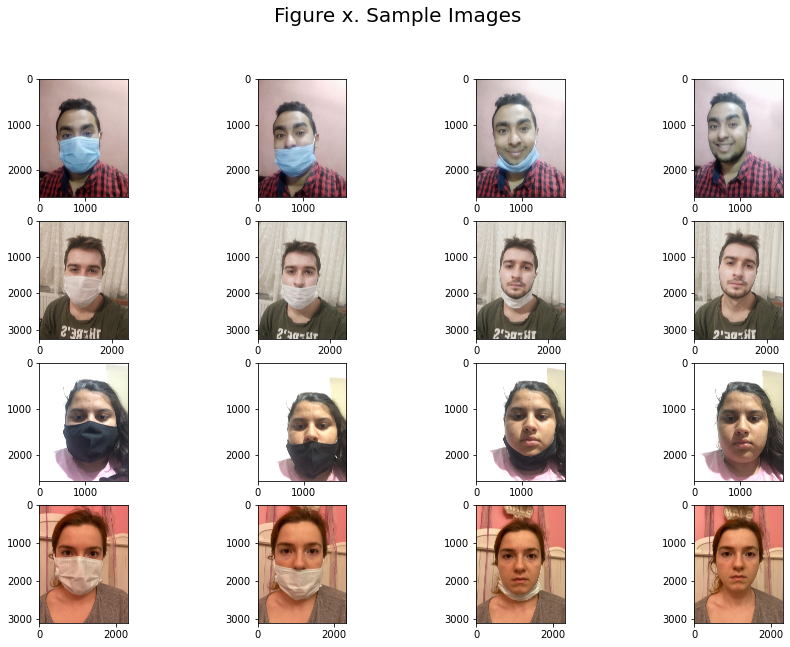

In [119]:
name_list = df['name'].to_list()

full_path = []
for name in name_list:
    filename = os.path.join(image_path,name)
    full_path.append(filename)


images = []
for i in full_path[:16]:
    img = cv2.imread(i)
    images.append(img)

plt.figure(figsize=(15,10))
plt.suptitle("Figure x. Sample Images", fontsize=20)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid(False)
    plt.imshow(images[i][:,:,::-1], cmap=plt.cm.binary)

In [45]:
df.head()

,ID,TYPE,USER_ID,GENDER,AGE,name,size_mb
0,1,1,1,MALE,25,000001_1_000001_MALE_25.jpg,1.801298
1,1,2,1,MALE,25,000001_2_000001_MALE_25.jpg,1.738558
2,1,3,1,MALE,25,000001_3_000001_MALE_25.jpg,1.799667
3,1,4,1,MALE,25,000001_4_000001_MALE_25.jpg,1.740264
4,2,1,2,MALE,23,000002_1_000002_MALE_23.jpg,1.549695


Text(0.5, 1.0, 'Figure x: Distribution of the Images according to file size.')

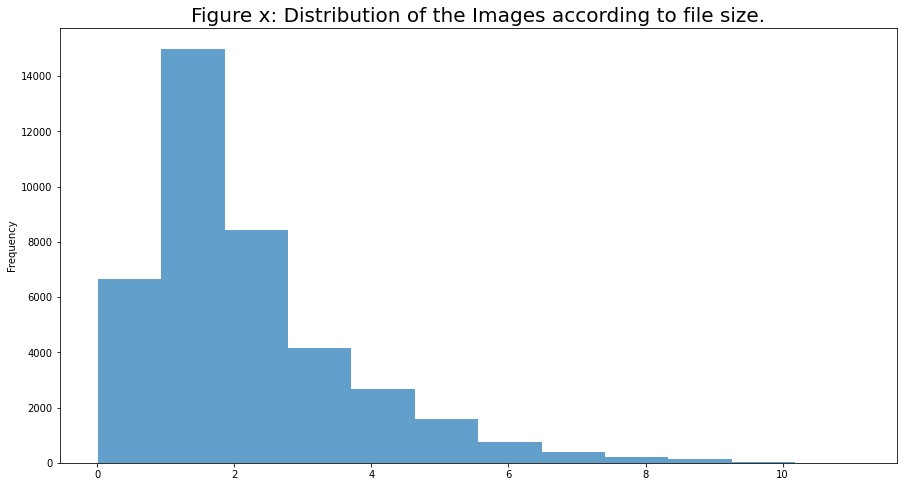

In [46]:
df['size_mb'].plot.hist(bins=12, alpha=0.7, figsize=(15, 8))
plt.title('Figure x: Distribution of the Images according to file size.', fontsize=20)

#### Scenario Type

#### Computing for the PCC

In [120]:
df['TYPE'].plot.bar(alpha=0.7, figsize=(15, 8))
plt.title('Figure x: Distribution of the Images according to file size.', fontsize=20)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd2c463c3a0> (for post_execute):


KeyboardInterrupt: 

In [121]:
df = df[(df['size_mb'] >  1.5) & (df['size_mb'] <  5.5)]
# Removing scenario 3
df = df[(df['TYPE'] !=  3)]
PCC = (
        (df[df['TYPE'] == 1]['TYPE'].count()/df['TYPE'].count())**2 +
        (df[df['TYPE'] == 2]['TYPE'].count()/df['TYPE'].count())**2 +
        (df[df['TYPE'] == 4]['TYPE'].count()/df['TYPE'].count())**2
      )

print('The PCC of a random classifier for this data set is:', round(PCC, 4), 'or', round(PCC*100, 2),'%')

The PCC of a random classifier for this data set is: 0.3334 or 33.34 %


#### Distribution of Scenario Type

In [128]:
df.head()

,ID,TYPE,USER_ID,GENDER,AGE,name,size_mb
0,1,1,1,MALE,25,000001_1_000001_MALE_25.jpg,1.801298
1,1,2,1,MALE,25,000001_2_000001_MALE_25.jpg,1.738558
3,1,4,1,MALE,25,000001_4_000001_MALE_25.jpg,1.740264
4,2,1,2,MALE,23,000002_1_000002_MALE_23.jpg,1.549695
5,2,2,2,MALE,23,000002_2_000002_MALE_23.jpg,1.631114


In [132]:
df['TYPE'].value_counts()

1    5617
2    5534
4    5407
Name: TYPE, dtype: int64

### Filtering the Data

Some of the images, especially the lower sized images were corrupted and thus produces an error while training the model. The workaround was to filter the images according to its file size. In this study, the researchers filtered the images that have file sizes ranging from `1.5 Mb` to `5.5 Mb`. The total size of the filtered images was `59.58 Gb` and the total number of images is `22,034`.

In [3]:
# Load the csv file
df_masks = spark.read.csv('s3://medical-masks-bdcc/df.csv', header=True).toPandas()
df_masks['size_mb'] = df_masks['size_mb'].astype(float)

# Filter out bad images
df_masks = df_masks[(df_masks['size_mb'] >  1.5) & (df_masks['size_mb'] <  5.5)]

# Get list of new database
df_masks['new_path'] = "s3://medical-masks-bdcc/" + df_masks['name'].astype(str)
file_list = df_masks['new_path'].tolist()
file_size = df_masks['size_mb'].sum(axis=0)

print(f'Total size of dataset: {file_size:.4f} MB')
print(f'Total number of images: {len(df_masks)}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total size of dataset: 59677.7661 MB
Total number of images: 22034

The images were then loaded and filtered again according to the classification. Originally, there are `four` classification of the way masks were worn.
- `1` for correctly wearing the facemask
- `2` for improper wearing of facemask - with the nose exposed
- `3` for improper wearing of facemask - with nose and mouth exposed
- `4` for totally not wearing a facemask

The researchers filtered and considered only classifications `1,2, and 4`. The reason for this is that the model is having a hard time distingusing between `scenarios 3 and 4` since both images has the person's nose and mouth exposed. `Scenario 3` is something that is irrelevant and may be treated like `scenario 4`.

With that, the total number of images that the model will process is `18,244`.

In [4]:
# Load the images
url = 's3://medical-masks-bdcc/??????_[1,2,4]_??????*.jpg'

images = (spark.read.format("binaryFile").
          option("pathGlobFilter", "*.jpg").
          load(url))
images = (images.filter(F.col('path').isin(file_list)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
images.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)

In [20]:
images.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

18244

In [21]:
# images.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

###  Featurizing the Images

A pre-trained deep neural network model was used to extract the relevant features from the images. In this study, the researchers used `EfficientNetB0`.

`EfficientNet` is a convolutional neural network architecture and scaling approach that uses a compound coefficient to consistently scale all depth/width/resolution dimensions. Unlike traditional methodology, which arbitrarily scales these elements, the EfficientNet scaling approach evenly adjusts network width, depth, and resolution using a predetermined set of scaling coefficients.

Transfer learning was used by removing the top layer of this network, and used the output as features to train the classic ML models. 

<center><b>Figure x: EfficientNet Building Blocks</b></center>

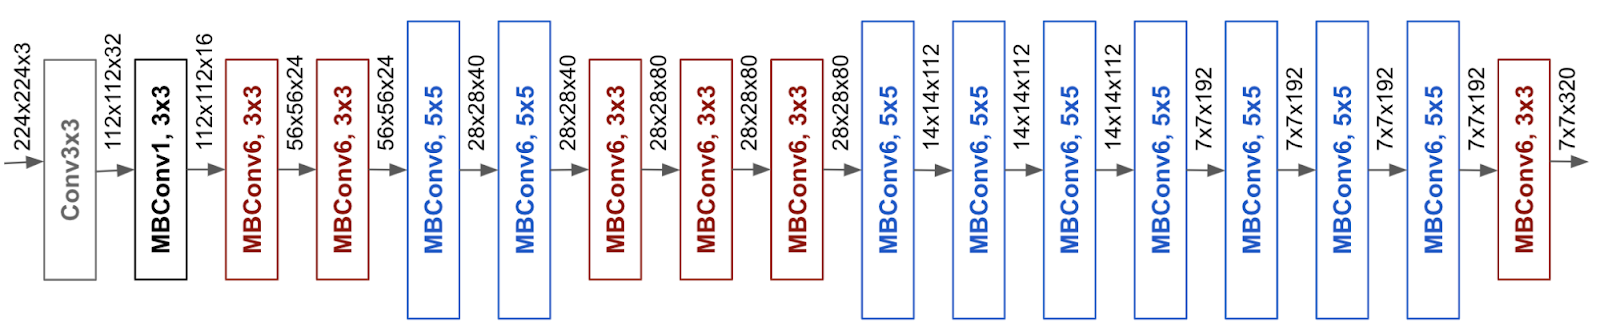

In [5]:
# Load the pre-trained model
model = EfficientNetB0(include_top=False)
model.summary()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [6]:
bc_model_weights = sc.broadcast(model.get_weights())

def model_fn():
    """
    Returns a deep learning model with top layer removed and broadcasted pretrained weights.
    """
    model = EfficientNetB0(weights=None, include_top=False)
    model.set_weights(bc_model_weights.value)
    return model

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    #   try:
    img = Image.open(io.BytesIO(content)).resize([128, 128])
    arr = img_to_array(img)
    return preprocess_input(arr)


def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    # For some layers, output features will be multi-dimensional tensors.
    # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
    output = [p.flatten() for p in preds]
    return pd.Series(output)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    '''
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).
    :param content_series_iter: This argument is an iterator over batches of data, where each batch 
    is a pandas Series of image data.
    '''
    # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
    # for multiple data batches.  This amortizes the overhead of loading big models.
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# Pandas UDFs on large records (e.g., very large images) can run into Out Of Memory (OOM) errors.
# If you hit such errors in the cell below, try reducing the Arrow batch size via `maxRecordsPerBatch`.
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "512")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
images.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1434

In [11]:
# We can now run featurization on our entire Spark DataFrame.
# NOTE: This can take a long time (about 10 minutes) since it applies a large model to the full dataset.
features_df = (images.repartition(images.rdd.getNumPartitions()*4).
               select(col("path"), featurize_udf("content").
                      alias("features")))
# features_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
features_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: float (containsNull = true)

In [12]:
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

# Create final dataframe
df = (features_df.
      withColumn('label', F.substring('path', 32, 1).cast('int')).
      withColumn('features', list_to_vector_udf(F.col('features'))))
# df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Distribution of data per label
df.select('label').groupby('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1| 5617|
|    4| 5407|
|    2| 5534|
+-----+-----+

In [33]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)

After featurizing the images, the data was split into `75% train` and `25% test`.

In [14]:
# Split the data into train and test
df_train, df_test = df.randomSplit([0.75, 0.25])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Training an ML Classifier

The dat was then fed to an ML Classifier. The ML models considered in this study are Random Forest and Logistic Regression. `Cross Validatior` was used for Logistic Regression to do grid search within k-fold cross-validation to find the optimal hyperparameter settings that generates the best model for the data.

The researchers tried to do cross validation for the random forest classifier, but unfortunately the run time was too long that the IAM account automatically logs out and terminates the notebook after 12 hours. With limited resources, the researchers couldn't do a rerun of the cross validation. Instead, manual tweaking of the hyper parameters was done.



#### Modelling using Logistic Regression

In [15]:
# Load the model
lr = LogisticRegression(featuresCol='features',
                        labelCol='label')

# Perform gridsearch to get the best parameter
paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.001, 0.01, 0.1])
                .build())

cv = CrossValidator(estimator=lr,
                    estimatorParamMaps=paramGrid,
                    evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                    numFolds=3)

cv_trained = CrossValidatorModel.load('s3://medical-masks-bdcc/EffNet_LRCV_mask_trained_124')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# Get predictions on the train set
df_train_pred = cv_trained.transform(df_train)

# Evaluate the prediction accuracy
print("Train set accuracy = " + str(evaluator.evaluate(df_train_pred.select("prediction", "label"))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train set accuracy = 0.9971783295711061

In [16]:
# Get the predictions
df_predictions = cv_trained.transform(df_test)

# Evaluate the prediction accuracy
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(df_predictions.select("prediction", "label"))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test set accuracy = 0.8842079922965816

In [17]:
df_predictions.groupby("prediction", "label").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+-----+
|prediction|label|count|
+----------+-----+-----+
|       4.0|    1|   12|
|       1.0|    4|    7|
|       4.0|    4| 1299|
|       1.0|    1| 1197|
|       2.0|    1|  187|
|       2.0|    2| 1177|
|       4.0|    2|   50|
|       2.0|    4|   44|
|       1.0|    2|  181|
+----------+-----+-----+

#### Modelling using Random Forest

## <font color="4988CD"> VII. Results and Discussion </font>

Comparing the performances of the two models used, Logistic Regression performed better with a test accuracy of `88.4%` compared to the test accuracy of Random Forest at `79.5%`.

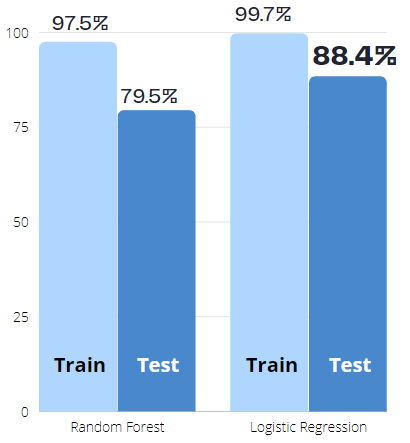

### Trying the model on the researchers photos

The researchers took photos of themselves, imitating scenarios 1,2, and 4. In this test, the model correctly predicted 9 out of 12 sample images. It was 75% correct. It is notable that the model had difficulty classifying Type 2, where the mask is worn incorrectly and covers either the nose or the mouth.

| **Name** 	| **Label** 	| **Prediction** 	|
|---	|---	|---	|
| Norman 	| 4 	| 4 	|
| Kash 	| 4 	| 4 	|
| Mark  	| 4 	| 4 	|
| Pau 	| 2 	| 2 	|
| Pau 	| 4 	| 4 	|
| Kash 	| 2 	| 2 	|
| Mark  	| 1 	| 1 	|
| Mark  	| 2 	| 2 	|
| * _Norman_ 	| _1_ 	| _2_ 	|
| * _Pau_ 	| _1_ 	| _2_ 	|
| Kash 	| 1 	| 1 	|
| * _Norman_ 	| _2_ 	| _4_ 	|

It is still better with a PCC of 33%, which means the ML model is better at classifying compared to random chance.

In [42]:
# Load the test images
url = 's3://medical-masks-bdcc/cpt11/??????_[1,2,4]_??????*.jpg'

images = (spark.read.format("binaryFile").
          option("pathGlobFilter", "*.jpg").
          load(url))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
# Featurize the data
features_df = (images.repartition(images.rdd.getNumPartitions()*4).
               select(col("path"), featurize_udf("content").
                      alias("features")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

# Create final dataframe
df = (features_df.
      withColumn('label', F.substring('path', 38, 1).cast('int')).
      withColumn('features', list_to_vector_udf(F.col('features'))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# Distribution per label
df.select('label').groupby('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|    4|
|    4|    4|
|    2|    4|
+-----+-----+

In [45]:
# Get predictions
df_predictions = cv_trained.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
# Get accuracy of model
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(df_predictions.select("prediction", "label"))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test set accuracy = 0.75

In [47]:
# Results
df_predictions.select('path', 'label', 'prediction').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------------+-----+----------+
|path                                                         |label|prediction|
+-------------------------------------------------------------+-----+----------+
|s3://medical-masks-bdcc/cpt11/xxxxxx_4_xxxxxx_Norman_40.jpg  |4    |4.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_4_xxxxxx_kash_39.jpg    |4    |4.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_4_xxxxxx_Mark_30.jpg.jpg|4    |4.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_2_xxxxxx_Pau_26.jpg     |2    |2.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_4_xxxxxx_Pau_26.jpg     |4    |4.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_2_xxxxxx_kash_39.jpg    |2    |2.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_1_xxxxxx_Mark_30.jpg.jpg|1    |1.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_2_xxxxxx_Mark_30.jpg.jpg|2    |2.0       |
|s3://medical-masks-bdcc/cpt11/xxxxxx_1_xxxxxx_Norman_40.jpg  |1    |2.0       |
|s3://medical-masks-bdcc/cpt

## <font color="4988CD"> VIII. Conclusion </font>

## <font color="4988CD"> IX. Limitations and Recommendations </font>

## <font color="4988CD"> X. Acknowledgements </font>

## <font color="4988CD"> XI. References </font>